# Etude de la détection automatique de caractéristiques sur un signal audio
![ISEN Lille](src/imgs/isen.jpg)

* [Github](http://github.com/lowlighter/sound)
* [Documentation](https://lowlighter.github.io/sound/docs/index.html)

In [1]:
%matplotlib inline 
%reload_ext autoreload
%autoreload 2 
%matplotlib notebook
from bin import *

In [2]:
%%html
<script>IPython.OutputArea.prototype._should_scroll = lines => { return false }</script>
<style>.output_wrapper button.btn.btn-default, .output_wrapper .ui-dialog-titlebar { display: none; } .ui-resizable { pointer-events:none; } .widget-hprogress { width: auto; }</style>

# > Support de tests

<IPython.core.display.Javascript object>


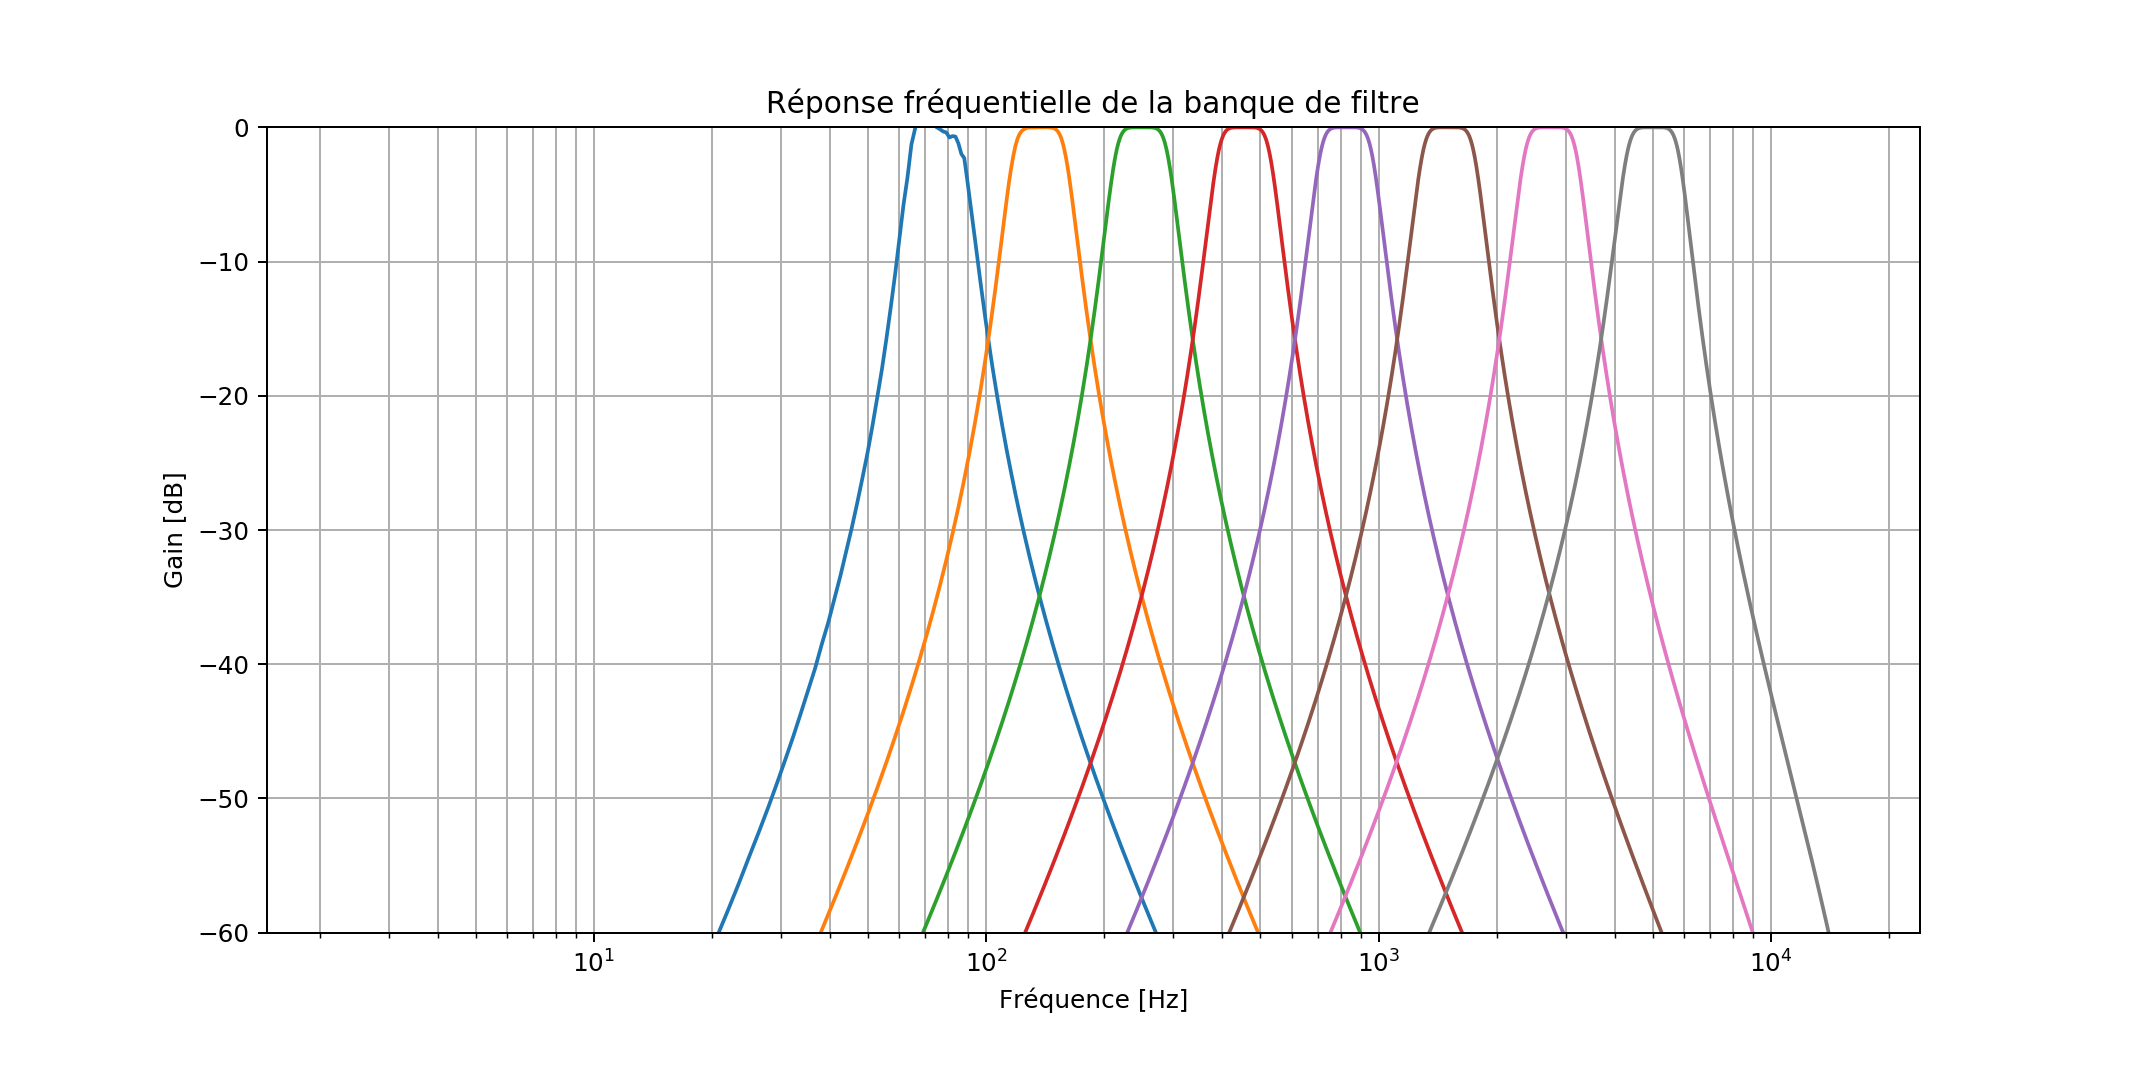

In [3]:
filters, filters_fq = gen_filters(q=3, n=3, fs=48000, nb_filters=8, fmin=75, fmax=5000)
plot_freqz(filters, fs=48000)

<IPython.core.display.Javascript object>


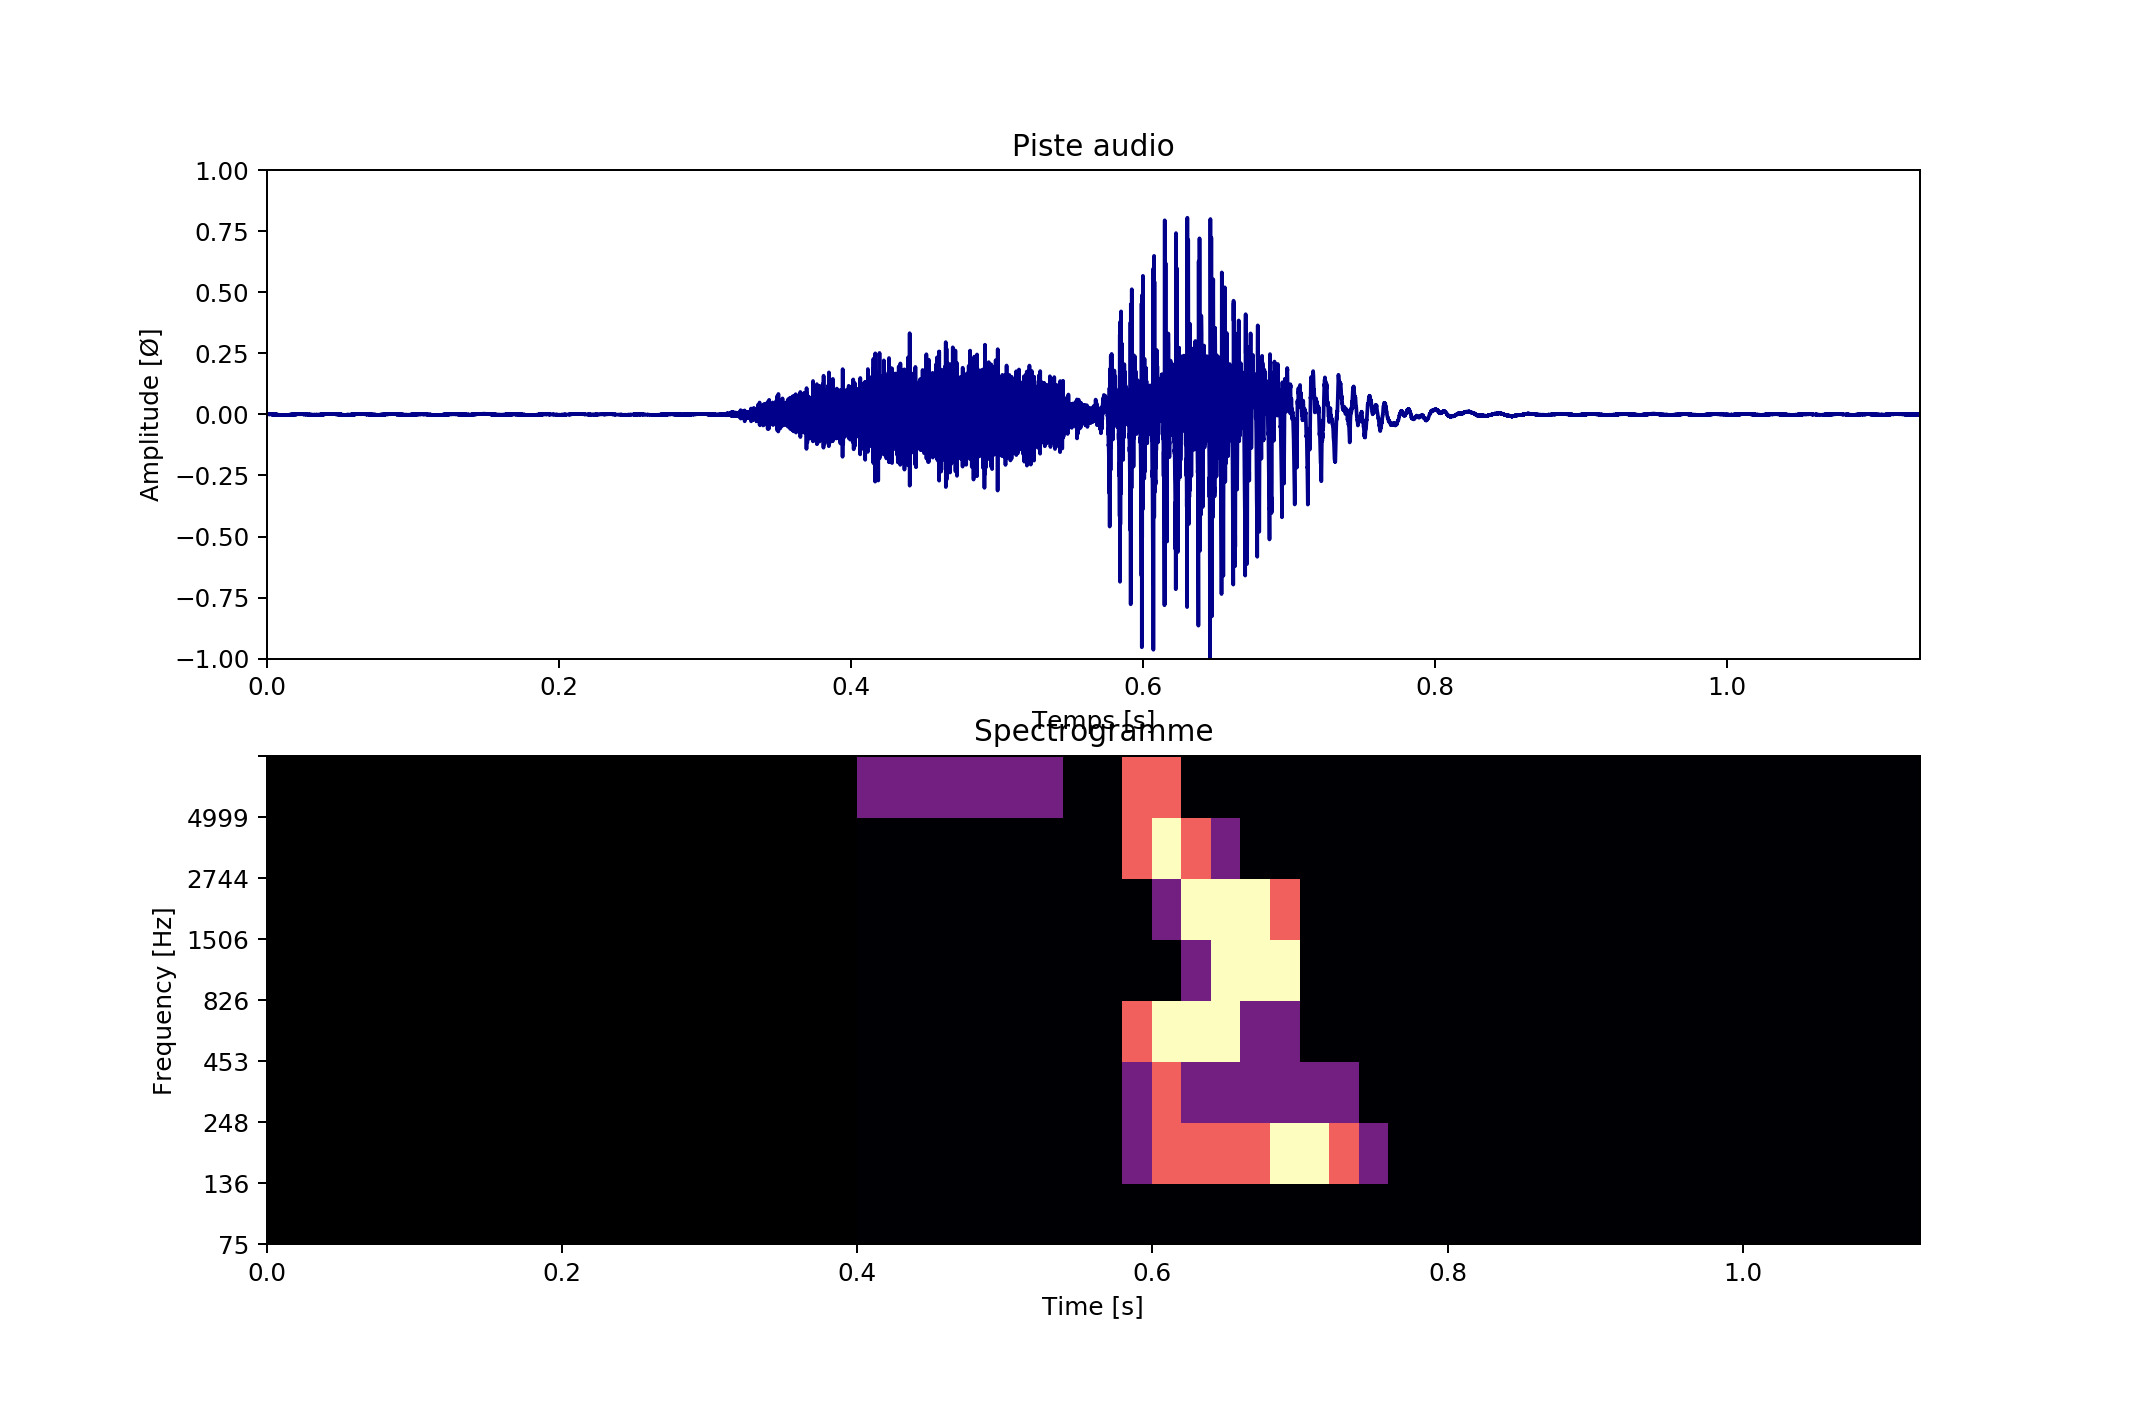

In [4]:
compute(
    file="src/learning/chien01.wav", 
    filters=filters,
    filters_fq=filters_fq,
    time_res=0.02, 
    amp_res=2
);

Préparation des fichiers à traiter...
   300 fichiers d'apprentissage récupérés
   150 fichiers de test récupérés
     3 valeurs (chien, chat, loup)

Acquisition des données...   300 fichiers d'apprentissage traités
   150 fichiers de test traités

Apprentissage...
   300 fichiers utilisés
   150 prédictions

Rapport détaillé du classificateur :
             precision    recall  f1-score   support

       chat       1.00      1.00      1.00        50
      chien       1.00      1.00      1.00        50
       loup       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150



<IPython.core.display.Javascript object>


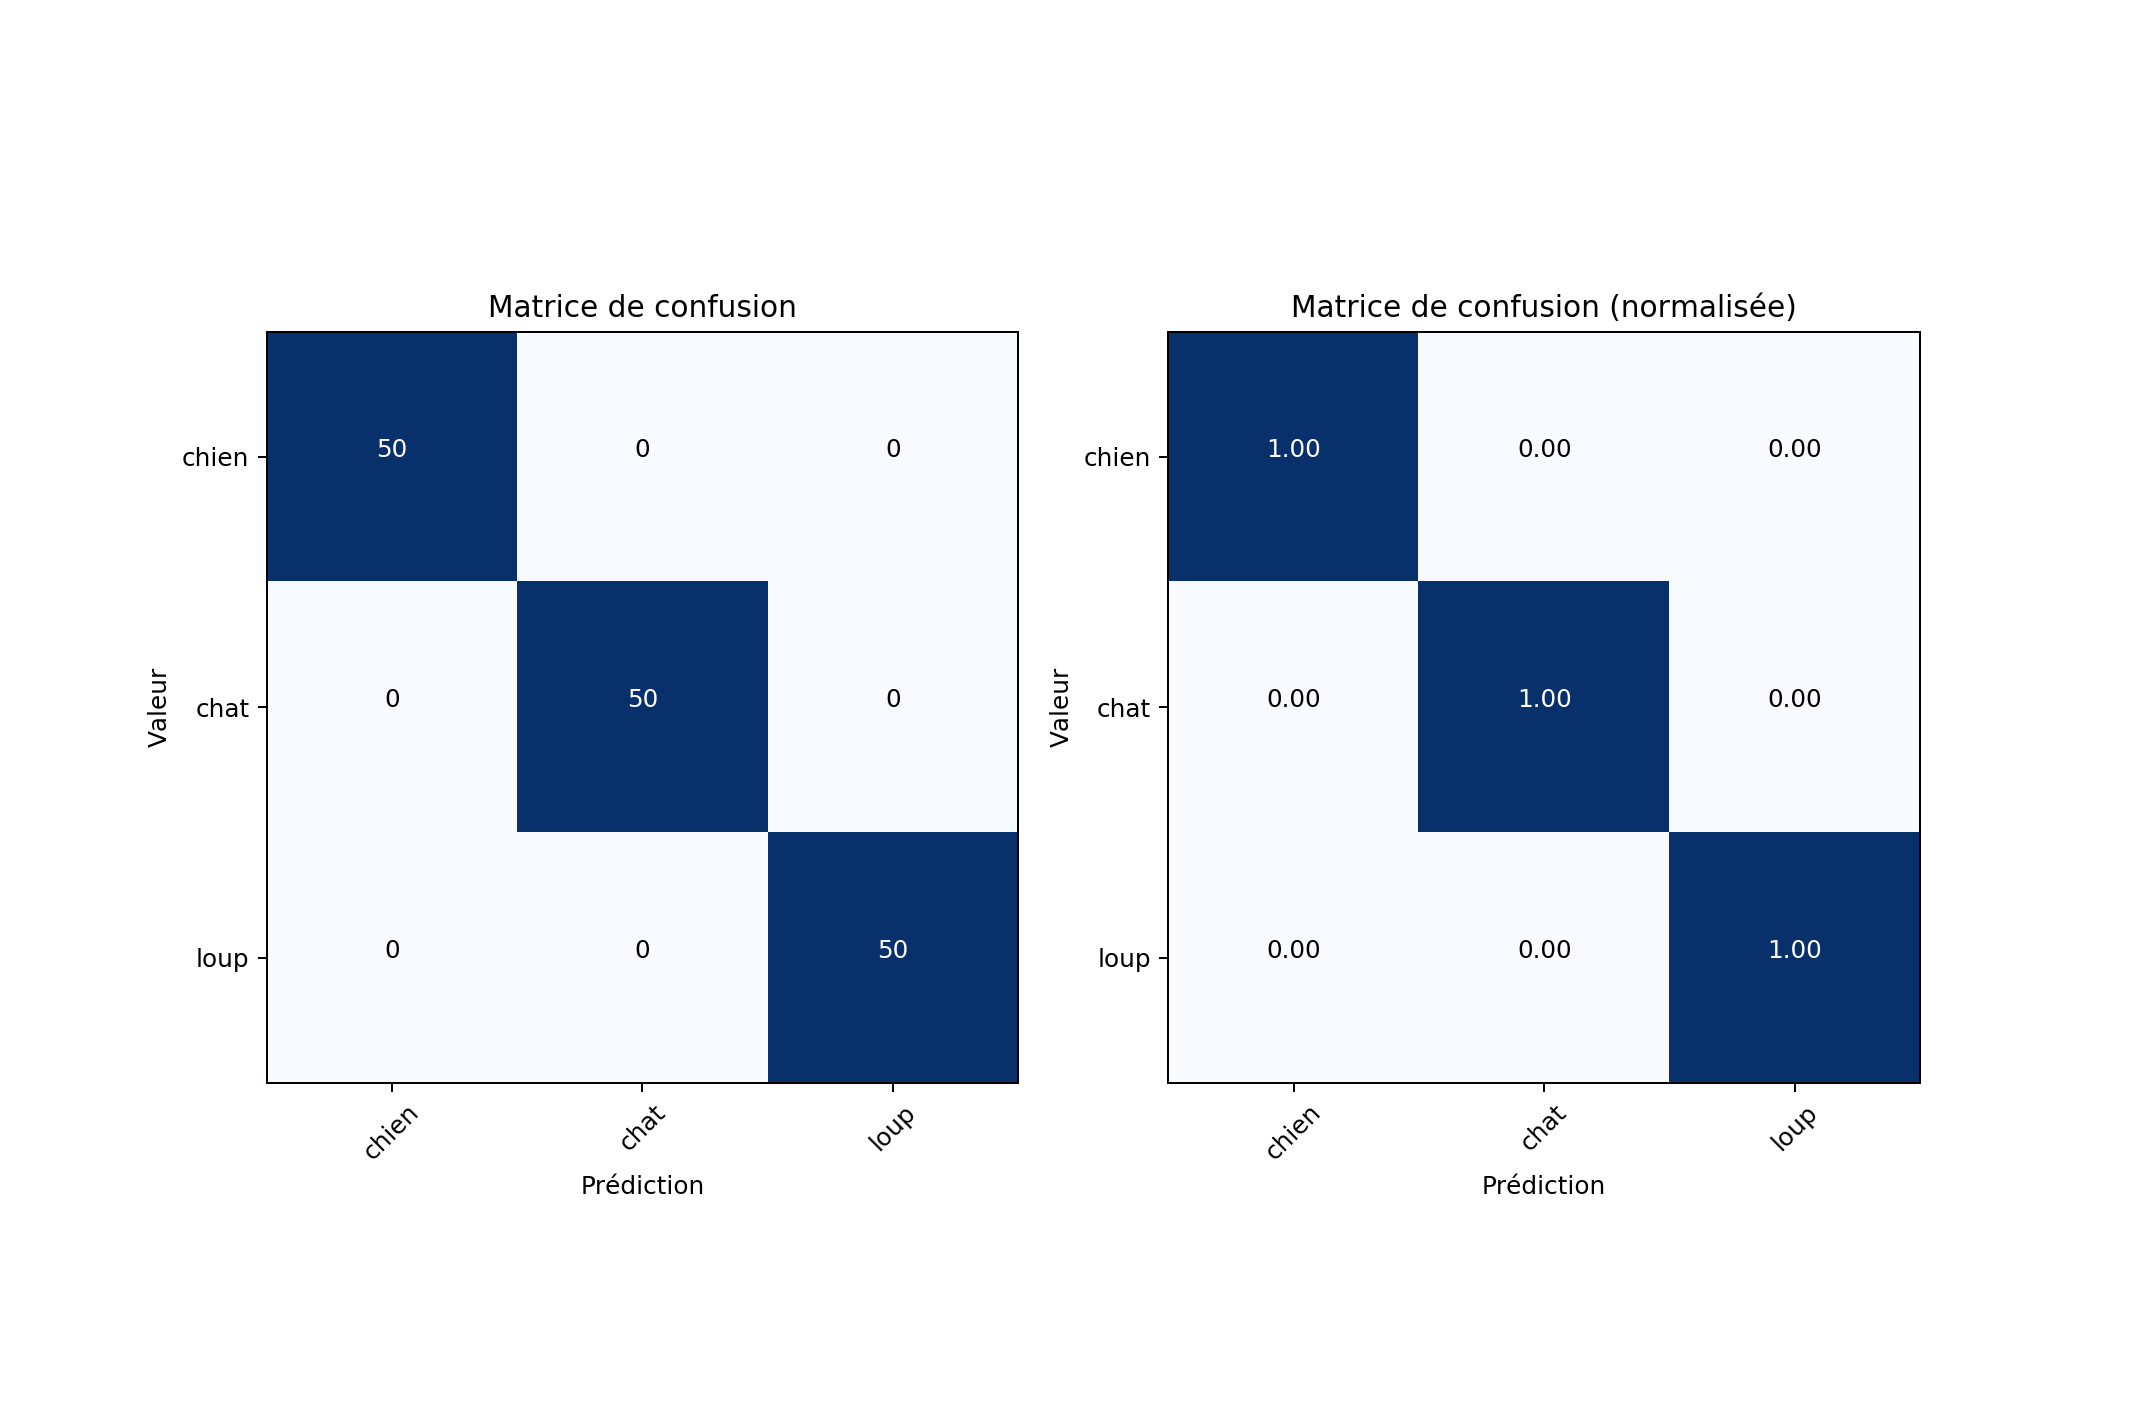

In [5]:
predict = learning(
    learn=["chien{i:02}", "chat{i:02}", "loup{i:02}"], learn_i=[100, 100, 100], 
    test=["chien{i:02}", "chat{i:02}", "loup{i:02}"], test_i=[50, 50, 50], 
    options={"fmin":75, "fmax":5000, "nb_filters":8, "q":1.5, "n":3, "time_res":0.05, "amp_res":4},
    neurons=(30)
)

In [6]:
predict(["chien01", "chien02", "chien03", "loup01", "loup02", "loup03"])

['chien' 'chien' 'chien' 'loup' 'loup' 'loup']


array(['chien', 'chien', 'chien', 'loup', 'loup', 'loup'],
      dtype='<U5')